In [1]:
import pandas as pd
import numpy as np
import os
import sys

sys.path.insert(0, '..')

from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

Using TensorFlow backend.


In [2]:
import umap
import umap.plot

In [27]:
raw_df = pd.read_hdf("../data/processed/summaries_protoss.hdf", "summaries")
raw_df.head()

,game_start,self_name,self_race_is_protoss,self_race_is_zerg,self_race_is_terran,opponent_name,opponent_race_is_protoss,opponent_race_is_zerg,opponent_race_is_terran,Adept_start,...,TwilightCouncil_start,TwilightCouncil_weight,VoidRay_start,VoidRay_weight,WarpGate_start,WarpGate_weight,WarpPrism_start,WarpPrism_weight,Zealot_start,Zealot_weight
038ca41ecf0198facf7425bfd5cfa9237f144e4e41d9c556b204612d55088de1_1,2020-02-02 13:34:45,ShoWTimE,1.0,0.0,0.0,cure,0.0,0.0,1.0,179.0,...,218.0,1.927659,0.0,0.0,180.0,1.0,579.0,1.306365,0.0,0.0
20d6247127ed58eeca069051672d3e8c3598e132d2fc6c445040701499b72acf_0,2020-02-01 15:07:59,ShoWTimE,1.0,0.0,0.0,Trap,1.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,170.0,1.0,343.0,1.000000,0.0,0.0
20d6247127ed58eeca069051672d3e8c3598e132d2fc6c445040701499b72acf_1,2020-02-01 15:07:59,Trap,1.0,0.0,0.0,ShoWTimE,1.0,0.0,0.0,343.0,...,0.0,0.000000,0.0,0.0,169.0,1.0,425.0,1.000000,0.0,0.0
ff388c7fd1b964cceb1b0c01e8eadf43f728ed79908cb28dec94376c8589ead8_0,2020-02-01 14:52:54,ShoWTimE,1.0,0.0,0.0,Trap,1.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,176.0,1.0,0.0,0.000000,0.0,0.0
ff388c7fd1b964cceb1b0c01e8eadf43f728ed79908cb28dec94376c8589ead8_1,2020-02-01 14:52:54,Trap,1.0,0.0,0.0,ShoWTimE,1.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,168.0,1.0,0.0,0.000000,0.0,0.0


In [29]:
metadata_columns = """
game_start
self_name self_race_is_protoss self_race_is_zerg self_race_is_terran
opponent_name
""".split()
data_columns = [col for col in raw_df.columns if col not in metadata_columns]

df = raw_df[data_columns]

encoding_dim = 16

In [30]:
input_data = Input(shape=(len(df.columns),))

encoded = Dense(64, activation='relu')(input_data)
encoded = Dense(32, activation='relu')(input_data)
encoded = Dense(32, activation='relu')(input_data)

encoded = Dense(encoding_dim, activation='relu',
               activity_regularizer=regularizers.l1(10e-3))(input_data)


decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(decoded)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(len(df.columns), activation='linear')(decoded)

autoencoder = Model(input_data, decoded)


In [31]:
encoder = Model(input_data, encoded)

In [32]:
autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')

In [33]:
x_all = df.sample(frac=1.0).values
num_samples = int(0.9 * x_all.shape[0])
x_train, x_test = x_all[:num_samples, :], x_all[num_samples:, :]
print("Training on {} samples. Testing on {}.".format(
    num_samples, x_all.shape[0] - num_samples))


Training on 2865 samples. Testing on 319.


In [34]:
autoencoder.fit(x_train, x_train,
                epochs=700,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Train on 2865 samples, validate on 319 samples
Epoch 1/700
2865/2865 [==============================] - 0s 61us/step - loss: 16526.7690 - val_loss: 13252.4595
Epoch 2/700
2865/2865 [==============================] - 0s 13us/step - loss: 9863.1104 - val_loss: 8464.4743
Epoch 3/700
2865/2865 [==============================] - 0s 14us/step - loss: 8227.4660 - val_loss: 7707.2448
Epoch 4/700
2865/2865 [==============================] - 0s 17us/step - loss: 7680.6708 - val_loss: 7264.2416
Epoch 5/700
2865/2865 [==============================] - 0s 15us/step - loss: 7222.6036 - val_loss: 6818.9407
Epoch 6/700
2865/2865 [==============================] - 0s 13us/step - loss: 6825.0498 - val_loss: 6619.6743
Epoch 7/700
2865/2865 [==============================] - 0s 12us/step - loss: 6608.3342 - val_loss: 6609.8884
Epoch 8/700
2865/2865 [==============================] - 0s 12us/step - loss: 6396.8067 - val_loss: 6450.7667
Epoch 9/700
2865/2865 [==============================] - 0s 12us/step -

2865/2865 [==============================] - 0s 12us/step - loss: 3515.9687 - val_loss: 3636.7588
Epoch 75/700
2865/2865 [==============================] - 0s 12us/step - loss: 3486.0346 - val_loss: 3552.8314
Epoch 76/700
2865/2865 [==============================] - 0s 12us/step - loss: 3450.2084 - val_loss: 3483.0677
Epoch 77/700
2865/2865 [==============================] - 0s 12us/step - loss: 3467.5075 - val_loss: 3377.7947
Epoch 78/700
2865/2865 [==============================] - 0s 12us/step - loss: 3452.5236 - val_loss: 3467.1632
Epoch 79/700
2865/2865 [==============================] - 0s 12us/step - loss: 3480.0965 - val_loss: 3733.7074
Epoch 80/700
2865/2865 [==============================] - 0s 13us/step - loss: 3490.7526 - val_loss: 3201.2580
Epoch 81/700
2865/2865 [==============================] - 0s 13us/step - loss: 3311.3723 - val_loss: 3575.0920
Epoch 82/700
2865/2865 [==============================] - 0s 14us/step - loss: 3502.4678 - val_loss: 3325.1353
Epoch 83/700
2

2865/2865 [==============================] - 0s 13us/step - loss: 2745.3527 - val_loss: 2982.6323
Epoch 148/700
2865/2865 [==============================] - 0s 14us/step - loss: 2779.3047 - val_loss: 2971.7086
Epoch 149/700
2865/2865 [==============================] - 0s 13us/step - loss: 2810.4251 - val_loss: 2741.5017
Epoch 150/700
2865/2865 [==============================] - 0s 14us/step - loss: 2684.6830 - val_loss: 3039.6595
Epoch 151/700
2865/2865 [==============================] - 0s 13us/step - loss: 2875.9652 - val_loss: 2849.7740
Epoch 152/700
2865/2865 [==============================] - 0s 13us/step - loss: 2711.6463 - val_loss: 2913.7304
Epoch 153/700
2865/2865 [==============================] - 0s 14us/step - loss: 2761.4060 - val_loss: 3029.7835
Epoch 154/700
2865/2865 [==============================] - 0s 12us/step - loss: 2839.5944 - val_loss: 2782.0772
Epoch 155/700
2865/2865 [==============================] - 0s 14us/step - loss: 2736.9581 - val_loss: 2832.3228
Epoch 

2865/2865 [==============================] - 0s 17us/step - loss: 2471.6756 - val_loss: 2551.4421
Epoch 221/700
2865/2865 [==============================] - 0s 16us/step - loss: 2449.6997 - val_loss: 2589.6099
Epoch 222/700
2865/2865 [==============================] - 0s 15us/step - loss: 2450.9066 - val_loss: 2618.2335
Epoch 223/700
2865/2865 [==============================] - 0s 15us/step - loss: 2409.3958 - val_loss: 2450.3695
Epoch 224/700
2865/2865 [==============================] - 0s 15us/step - loss: 2545.1862 - val_loss: 2477.5086
Epoch 225/700
2865/2865 [==============================] - 0s 16us/step - loss: 2395.3373 - val_loss: 2536.9987
Epoch 226/700
2865/2865 [==============================] - 0s 16us/step - loss: 2432.0494 - val_loss: 2387.4766
Epoch 227/700
2865/2865 [==============================] - 0s 17us/step - loss: 2411.8851 - val_loss: 2369.0913
Epoch 228/700
2865/2865 [==============================] - 0s 15us/step - loss: 2388.8559 - val_loss: 2484.7213
Epoch 

2865/2865 [==============================] - 0s 12us/step - loss: 2251.1177 - val_loss: 2353.1469
Epoch 294/700
2865/2865 [==============================] - 0s 15us/step - loss: 2268.0447 - val_loss: 2368.8571
Epoch 295/700
2865/2865 [==============================] - 0s 14us/step - loss: 2318.4026 - val_loss: 2229.4750
Epoch 296/700
2865/2865 [==============================] - 0s 13us/step - loss: 2172.6037 - val_loss: 2438.9381
Epoch 297/700
2865/2865 [==============================] - 0s 15us/step - loss: 2322.5632 - val_loss: 2328.8535
Epoch 298/700
2865/2865 [==============================] - 0s 14us/step - loss: 2276.7986 - val_loss: 2282.2572
Epoch 299/700
2865/2865 [==============================] - 0s 13us/step - loss: 2170.9852 - val_loss: 2429.0332
Epoch 300/700
2865/2865 [==============================] - 0s 14us/step - loss: 2316.4939 - val_loss: 2495.2130
Epoch 301/700
2865/2865 [==============================] - 0s 13us/step - loss: 2337.8410 - val_loss: 2368.3736
Epoch 

2865/2865 [==============================] - 0s 16us/step - loss: 2096.9920 - val_loss: 2461.2285
Epoch 367/700
2865/2865 [==============================] - 0s 15us/step - loss: 2208.6203 - val_loss: 2280.1605
Epoch 368/700
2865/2865 [==============================] - 0s 16us/step - loss: 2197.0628 - val_loss: 2232.4925
Epoch 369/700
2865/2865 [==============================] - 0s 16us/step - loss: 2098.4622 - val_loss: 2161.2948
Epoch 370/700
2865/2865 [==============================] - 0s 16us/step - loss: 2112.9025 - val_loss: 2227.2533
Epoch 371/700
2865/2865 [==============================] - 0s 13us/step - loss: 2154.0912 - val_loss: 2313.9481
Epoch 372/700
2865/2865 [==============================] - 0s 14us/step - loss: 2109.7126 - val_loss: 2246.7312
Epoch 373/700
2865/2865 [==============================] - 0s 12us/step - loss: 2231.9233 - val_loss: 2472.9300
Epoch 374/700
2865/2865 [==============================] - 0s 12us/step - loss: 2176.4563 - val_loss: 2264.5803
Epoch 

2865/2865 [==============================] - 0s 15us/step - loss: 2211.1356 - val_loss: 2136.9021
Epoch 440/700
2865/2865 [==============================] - 0s 13us/step - loss: 2047.1415 - val_loss: 2182.9605
Epoch 441/700
2865/2865 [==============================] - 0s 16us/step - loss: 2039.5401 - val_loss: 2158.4196
Epoch 442/700
2865/2865 [==============================] - 0s 17us/step - loss: 2138.7783 - val_loss: 2328.1042
Epoch 443/700
2865/2865 [==============================] - 0s 17us/step - loss: 2041.1803 - val_loss: 2246.6403
Epoch 444/700
2865/2865 [==============================] - 0s 14us/step - loss: 2060.6621 - val_loss: 2704.7420
Epoch 445/700
2865/2865 [==============================] - 0s 14us/step - loss: 2174.9184 - val_loss: 2048.7874
Epoch 446/700
2865/2865 [==============================] - 0s 13us/step - loss: 1994.7036 - val_loss: 2024.9189
Epoch 447/700
2865/2865 [==============================] - 0s 12us/step - loss: 2064.8197 - val_loss: 2313.8272
Epoch 

2865/2865 [==============================] - 0s 11us/step - loss: 1991.0626 - val_loss: 2274.3950
Epoch 513/700
2865/2865 [==============================] - 0s 12us/step - loss: 2050.4740 - val_loss: 2228.2164
Epoch 514/700
2865/2865 [==============================] - 0s 12us/step - loss: 2136.5103 - val_loss: 2635.0539
Epoch 515/700
2865/2865 [==============================] - 0s 13us/step - loss: 2100.3326 - val_loss: 2166.0674
Epoch 516/700
2865/2865 [==============================] - 0s 13us/step - loss: 1970.6675 - val_loss: 2094.9499
Epoch 517/700
2865/2865 [==============================] - 0s 12us/step - loss: 1993.3946 - val_loss: 2098.0136
Epoch 518/700
2865/2865 [==============================] - 0s 13us/step - loss: 2068.4348 - val_loss: 2227.8088
Epoch 519/700
2865/2865 [==============================] - 0s 13us/step - loss: 2000.2583 - val_loss: 2280.9780
Epoch 520/700
2865/2865 [==============================] - 0s 14us/step - loss: 2168.2218 - val_loss: 2113.7137
Epoch 

2865/2865 [==============================] - 0s 13us/step - loss: 2020.1156 - val_loss: 2107.6896
Epoch 586/700
2865/2865 [==============================] - 0s 12us/step - loss: 2049.1316 - val_loss: 2004.8768
Epoch 587/700
2865/2865 [==============================] - 0s 12us/step - loss: 1873.4968 - val_loss: 2273.7752
Epoch 588/700
2865/2865 [==============================] - 0s 12us/step - loss: 2017.2790 - val_loss: 2078.7061
Epoch 589/700
2865/2865 [==============================] - 0s 12us/step - loss: 2039.3335 - val_loss: 2397.9923
Epoch 590/700
2865/2865 [==============================] - 0s 13us/step - loss: 2040.0846 - val_loss: 2099.7325
Epoch 591/700
2865/2865 [==============================] - 0s 12us/step - loss: 1922.2417 - val_loss: 2140.5307
Epoch 592/700
2865/2865 [==============================] - 0s 12us/step - loss: 1985.7867 - val_loss: 2386.4869
Epoch 593/700
2865/2865 [==============================] - 0s 13us/step - loss: 1986.7516 - val_loss: 2179.8031
Epoch 

2865/2865 [==============================] - 0s 12us/step - loss: 1919.3998 - val_loss: 2087.0402
Epoch 659/700
2865/2865 [==============================] - 0s 13us/step - loss: 1962.5063 - val_loss: 2229.8710
Epoch 660/700
2865/2865 [==============================] - 0s 12us/step - loss: 1952.9392 - val_loss: 2169.6905
Epoch 661/700
2865/2865 [==============================] - 0s 12us/step - loss: 1940.3909 - val_loss: 2129.8687
Epoch 662/700
2865/2865 [==============================] - 0s 13us/step - loss: 1940.3443 - val_loss: 2190.3642
Epoch 663/700
2865/2865 [==============================] - 0s 12us/step - loss: 1994.8006 - val_loss: 2181.7808
Epoch 664/700
2865/2865 [==============================] - 0s 12us/step - loss: 1951.1753 - val_loss: 2130.1294
Epoch 665/700
2865/2865 [==============================] - 0s 12us/step - loss: 1929.7234 - val_loss: 2374.0288
Epoch 666/700
2865/2865 [==============================] - 0s 12us/step - loss: 1938.1047 - val_loss: 1954.7334
Epoch 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


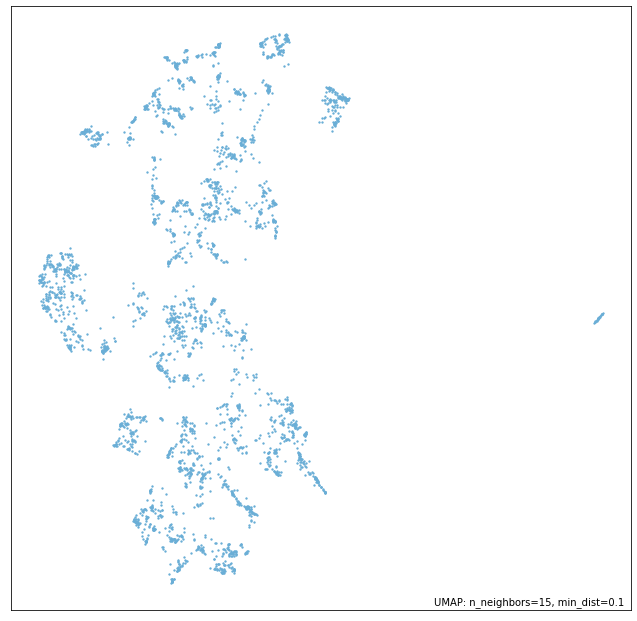

In [35]:
rawmapper = umap.UMAP().fit(df)
umap.plot.points(rawmapper)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


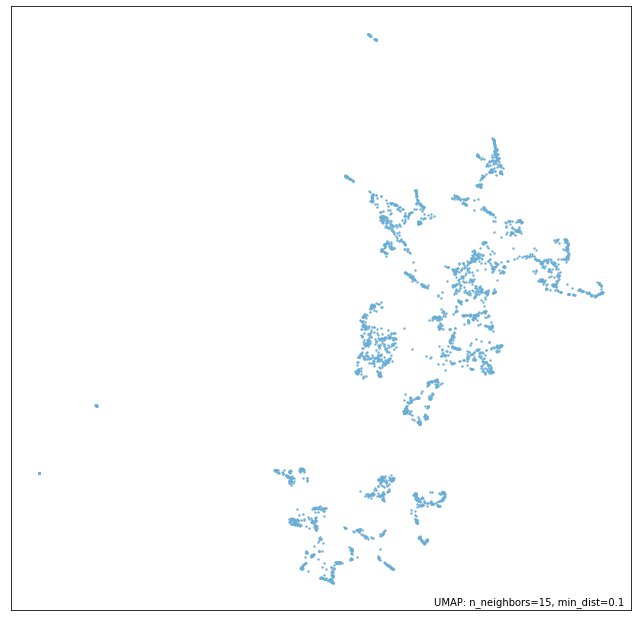

In [36]:
rawmapper = umap.UMAP().fit(encoder.predict(df.values))
umap.plot.points(rawmapper)

In [38]:
from sklearn.cluster import KMeans, DBSCAN
encoded_space = encoder.predict(df.values)
kmeans = KMeans(n_clusters=25).fit(encoded_space)
dbscan = DBSCAN(min_samples=10, eps=0.3).fit(encoded_space)

In [39]:
kmeans_prediction = kmeans.predict(encoded_space)
dbscan_prediction = dbscan.labels_


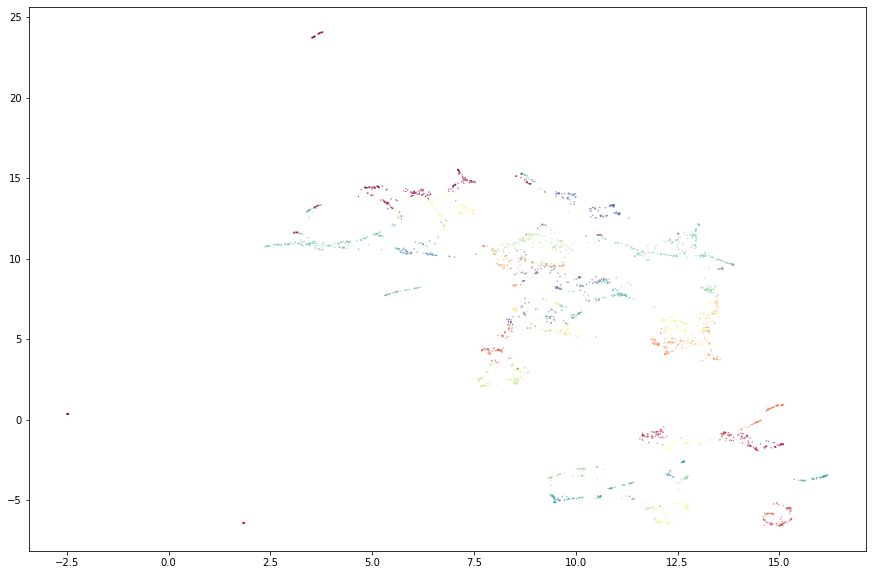

In [40]:
standard_embedding = umap.UMAP(random_state=42).fit_transform(encoded_space)
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=kmeans_prediction, s=0.1, cmap='Spectral')

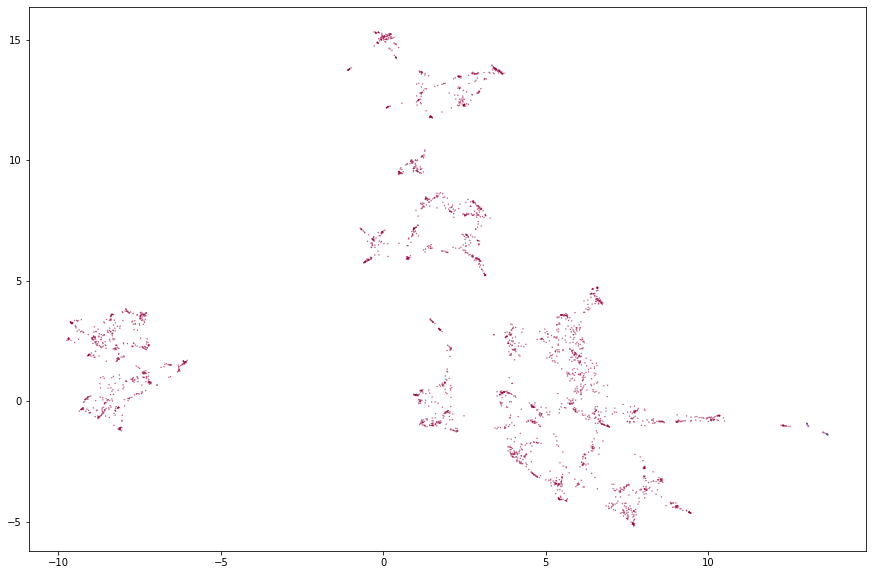

In [32]:
#standard_embedding = umap.UMAP(random_state=42).fit_transform(encoded_space)
#plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=dbscan_prediction, s=0.1, cmap='Spectral')

In [41]:
clusters = kmeans.cluster_centers_

In [42]:
def _distance(point_a, point_b):
    delta = point_a - point_b
    return np.sqrt(np.matmul(delta, delta.T))

In [43]:
def min_distance_from_cluster(row):
    return min(_distance(cluster, row) for cluster in clusters)

In [46]:
#df.head(2).apply(min_distance_from_cluster, axis=1)

In [45]:
distances = np.apply_along_axis(min_distance_from_cluster, 1, encoded_space)

969

In [48]:
raw_df.iloc[np.argmin(distances)]

game_start              2019-11-23 11:25:02
self_name                          ShoWTimE
self_race_is_protoss                      1
self_race_is_zerg                         0
self_race_is_terran                       0
                               ...         
WarpGate_weight                           1
WarpPrism_start                           0
WarpPrism_weight                          0
Zealot_start                              0
Zealot_weight                             0
Name: 09d1b0c6963686c66b3d1a8d0985420c6000b83c57a634ca0760ad174dd49b08_1, Length: 111, dtype: object

In [49]:
raw_df.iloc[np.argmax(distances)]

game_start              2020-01-05 12:56:57
self_name                      IIIIIIIIIIII
self_race_is_protoss                      1
self_race_is_zerg                         0
self_race_is_terran                       0
                               ...         
WarpGate_weight                           1
WarpPrism_start                           0
WarpPrism_weight                          0
Zealot_start                              0
Zealot_weight                             0
Name: cf82f34392e30674e2d30b8844f06bf36729c868012f2f66daafef2cd80e74e2_1, Length: 111, dtype: object